In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Correlation approach to clense data
Use pairwise correlation in order to decide which which markets are duplicates then use the one with the longer history. 

In [2]:
cleansed=cleansed_data()

tsmom_model.py:111: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:113: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


ICE-BRENT CRUDE OIL    True
ICE-GAS OIL            True
Name: NYM-NY HARBOR ULSD, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
SGX DT-NIKKEI 225 ETS         True
Name: OSX-NIKKEI 225 INDEX, dtype: bool
NYM-LIGHT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
ICE-GAS OIL            True
Name: ICE-BRENT CRUDE OIL, dtype: bool
ICE-BRENT CRUDE OIL    True
NYM-NY HARBOR ULSD     True
Name: ICE-GAS OIL, dtype: bool
SGX DT-NIKKEI 225 ETS    True
OSX-NIKKEI 225 INDEX     True
Name: CME-NIKKEI 225 INDEX COMB., dtype: bool
S&P MidCap 400            True
Dow Jones                 True
CME-MINI S&P 500 INDEX    True
Name: CME-S&P 500 INDEX COMP, dtype: bool
CME-NIKKEI 225 INDEX COMB.    True
OSX-NIKKEI 225 INDEX          True
Name: SGX DT-NIKKEI 225 ETS, dtype: bool
CME-S&P 500 INDEX COMP    True
Russell 2000              True
Name: S&P MidCap 400, dtype: bool

tsmom_model.py:80: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  corr=df.resample(rule='m',how='last').corr()
tsmom_model.py:100: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  mkt1 =df[x].resample(rule='m',how='last').count()


tsmom_model.py:101: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  mkt2 =df[y].resample(rule='m',how='last').count()


In [3]:
cleansed.count().count()

142

# Volume of contracts load


In [4]:
total_vol=calculate_dollar_volume(cleansed)

tsmom_model.py:18: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='mean')
tsmom_model.py:20: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='sum')
tsmom_model.py:22: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='m',how='mean')[:'2016']
tsmom_model.py:22: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='m',how='mean')[:'2016']
tsmom_model.py:25: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future versio

MEXDER-10YR BOND
ZCE-RAPESEED MEAL
BMF-US DOLLAR
NORDPOOL-ENO QTR
EEX-MONTHLY PEAKLOAD
LIFFE-10Y E SWAPNOTE
LIFFE-2YR E SWAPNOTE
OSX-NIKKEI 225 INDEX
ENDEX-TTF GAS BASE LOAD
ENDEX-TTF GAS BASE LOAD QTR
ENDEX-TTF GAS BASE LOAD SEASON
Canadian Bankers Acceptance
Russian Ruble


tsmom_model.py:36: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  px=cleansed.resample(rule='m',how='last')


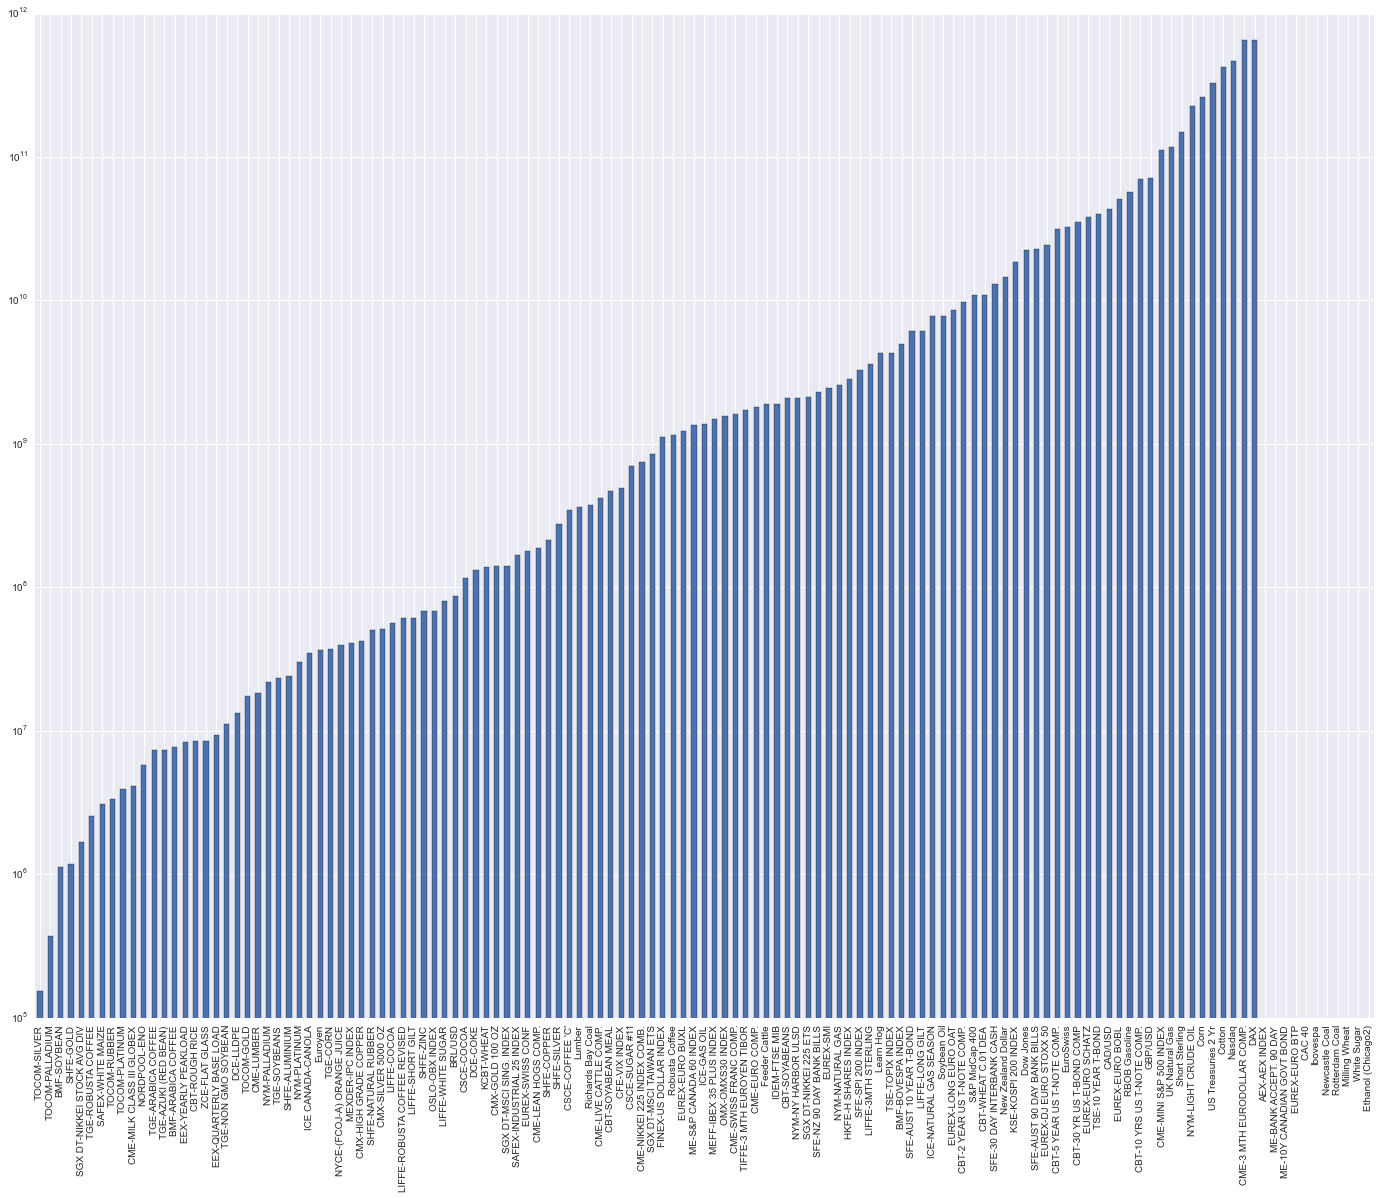

In [5]:
t=total_vol[:'2016'].tail(1).index[0]
total_vol[:'2016'].tail(1).T[t].sort_values().plot(kind='bar',logy=True)

In [6]:
total_vol[:'2016'].tail(1).T[t].sort_values().tail(10)

ME-BANK ACCEPT. 90 DAY      NaN
ME-10Y CANADIAN GOVT BOND   NaN
EUREX-EURO BTP              NaN
CAC 40                      NaN
Ibovespa                    NaN
Newcastle Coal              NaN
Rotterdam Coal              NaN
Milling Wheat               NaN
White Sugar                 NaN
Ethanol (Chicago2)          NaN
Name: 2016-12-31 00:00:00, dtype: float64

In [7]:
def tsmom_improved2(data,months):
    vol=pd.ewmstd(data.pct_change(),250)*math.sqrt(12)
    data = data.resample(rule='m',how='last')
    signal=data/data.shift(months)-1
    signal = signal /abs(signal)
    position=signal / vol 
    return position
data = cleansed.resample(rule='m').last()[:'2016']
pos=tsmom_improved2(data,12)
pnl=calc_pnl(pos,data)
sr=calc_Sharpe(pnl)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=0,adjust=True,com=250).std(bias=False)
  from IPython.kernel.zmq import kernelapp as app
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  app.launch_new_instance()


In [8]:
q_pnl, q_means=quantile_pnl_and_means(cleansed,total_vol,pnl,4)

tsmom_model.py:61: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  sharpes.append(pnl.resample(rule='m',how='sum').T[year][mkts].mean())
tsmom_model.py:62: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  means.append(cleansed.resample(rule='m',how='last')[mkts].pct_change()[str(y)].mean().mean())


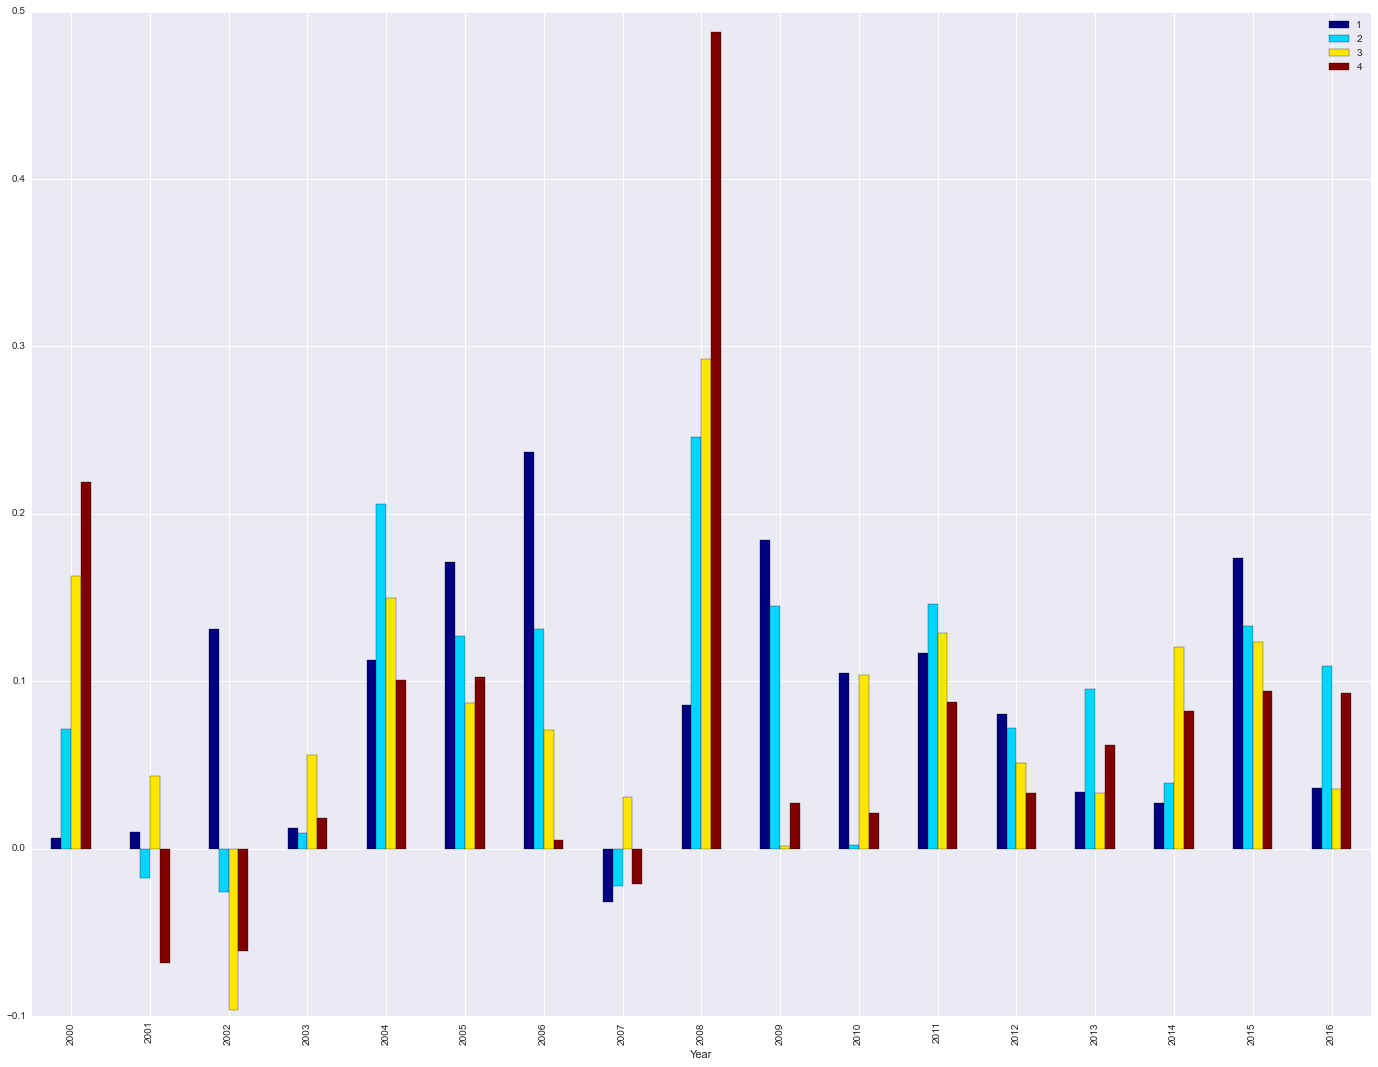

In [9]:
q_pnl.plot(kind='bar',colormap='jet')

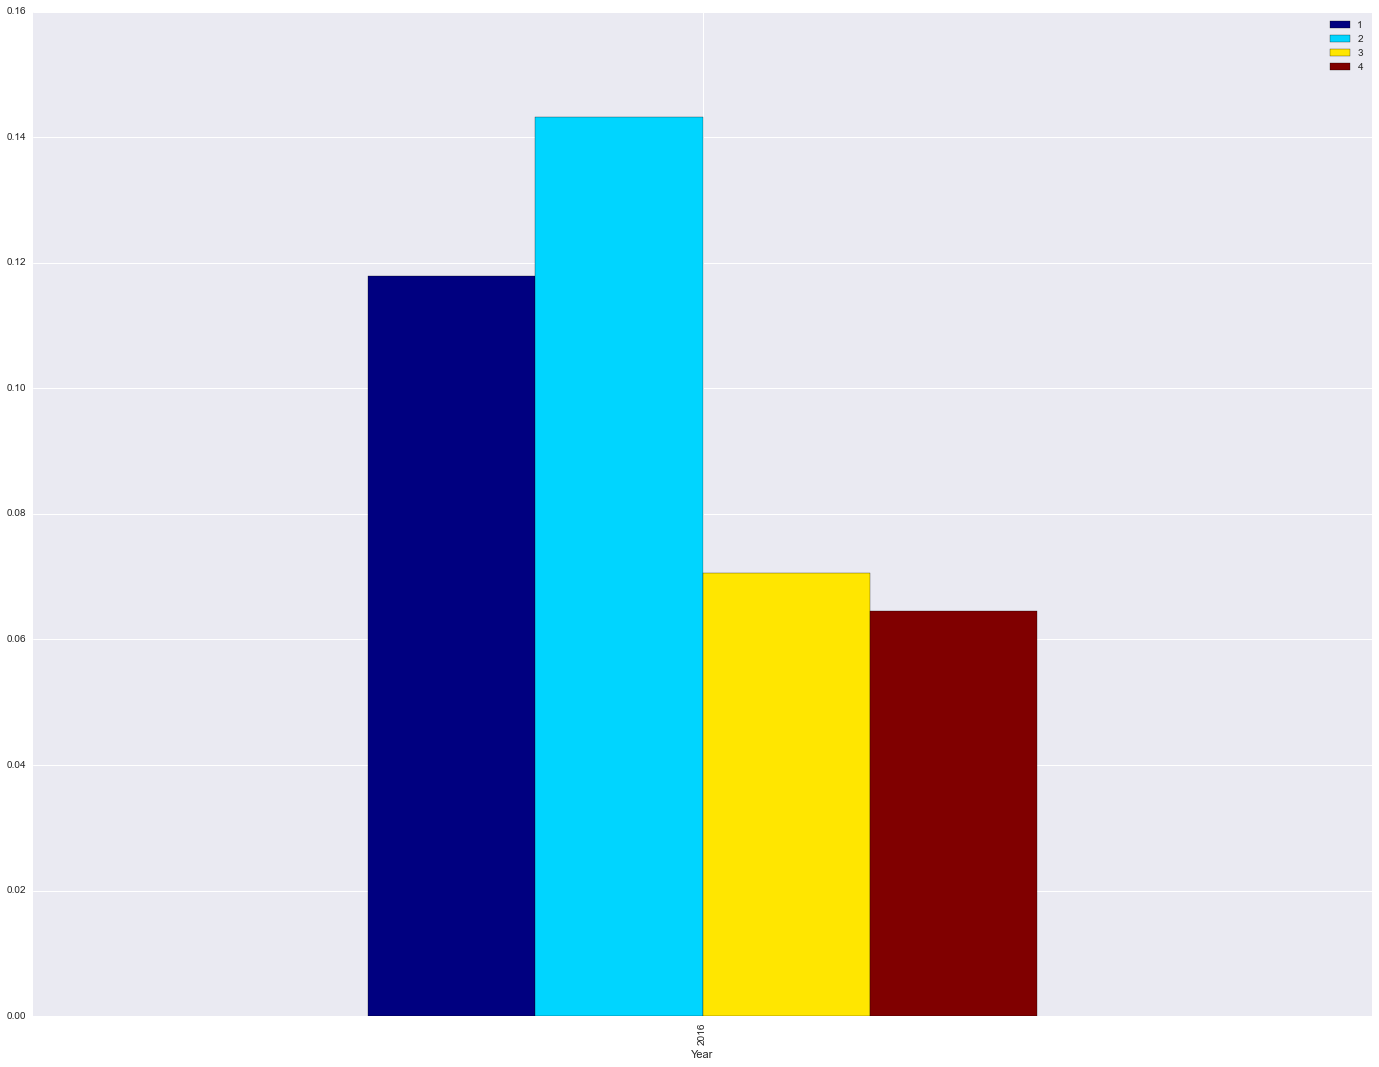

In [25]:
q_means.cumsum().tail(1).plot(kind='bar',colormap='jet')

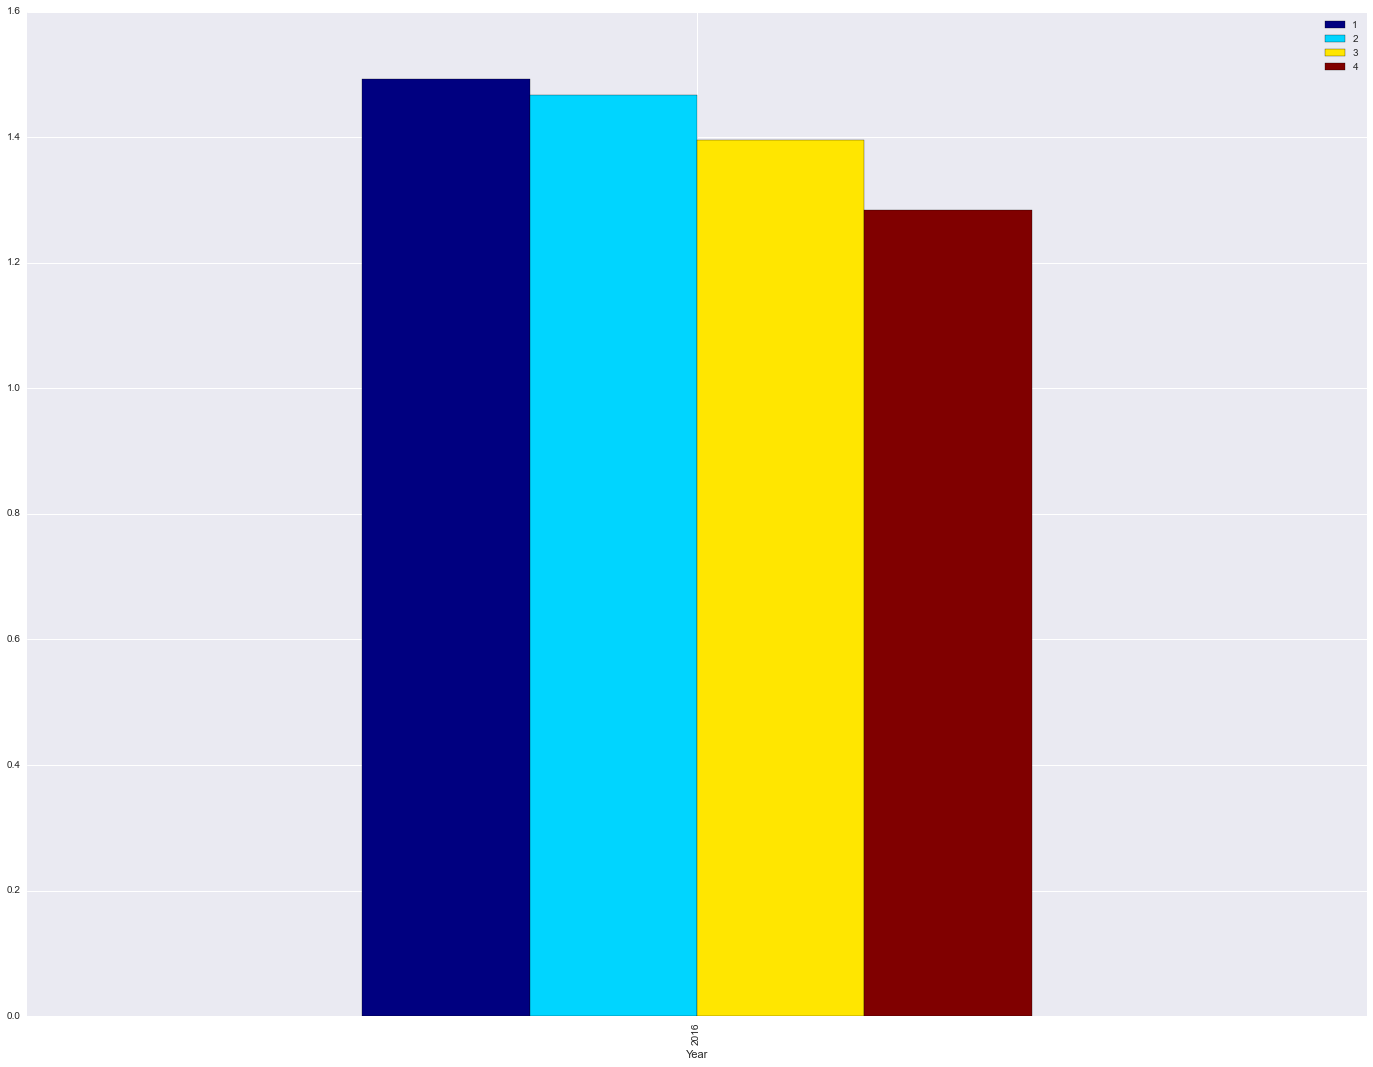

In [10]:
q_pnl.cumsum().tail(1).plot(kind='bar',colormap='jet')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


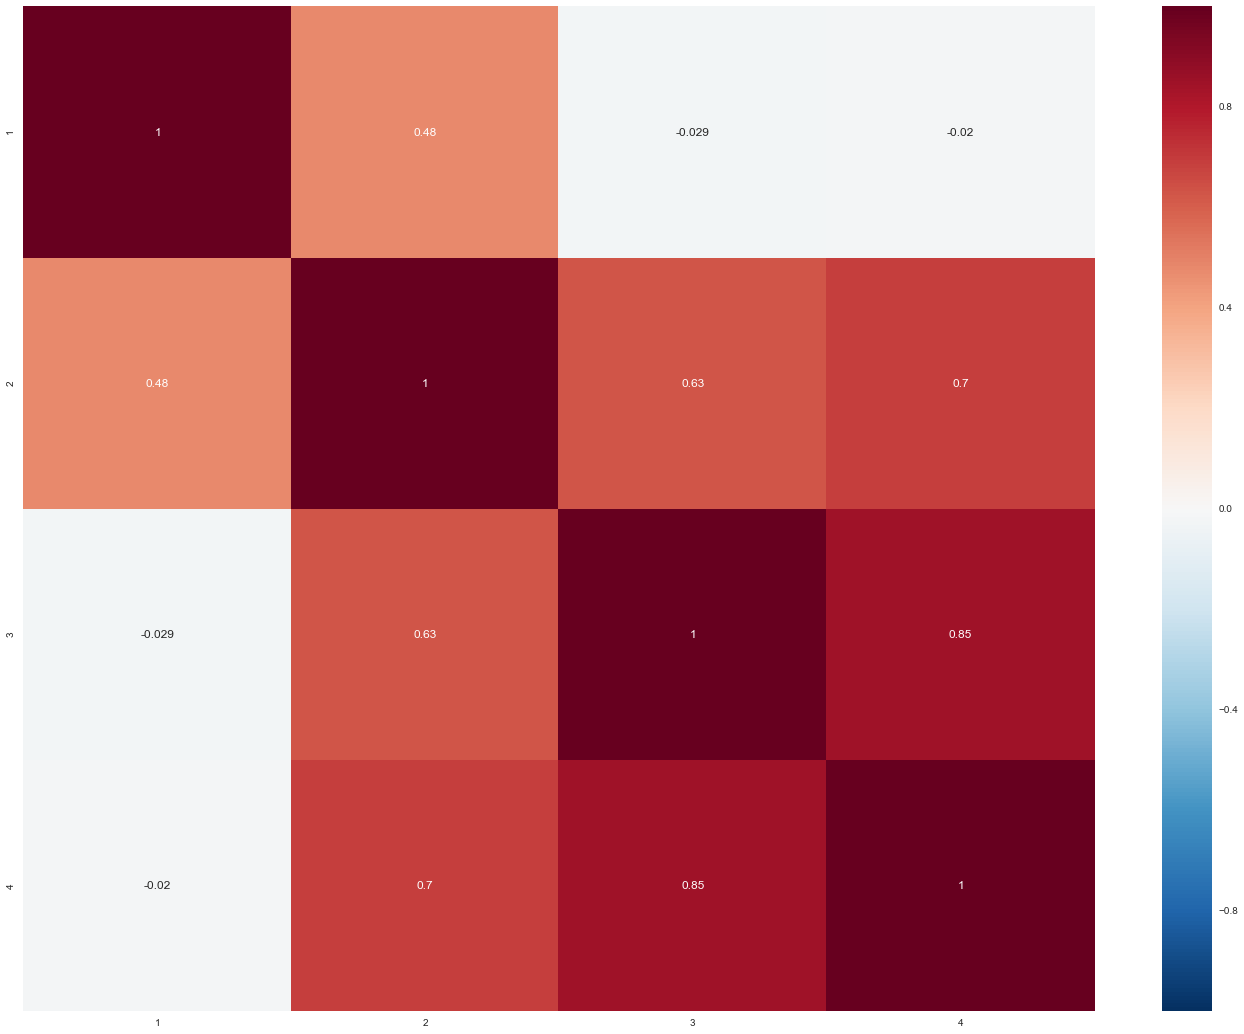

In [12]:
sns.heatmap(q_pnl.corr(),annot=True)

In [13]:
contract_size =load_maps()
sector_map=contract_size.to_dict()['Sector']
compare =pd.DataFrame()
compare['Sharpe']=sr
s=pd.Series()
for i in sr.index:
    try:
        s[i]=sector_map[i]
    except:
        print i
compare['Sector']=s
compare['Volume']=np.log(total_vol.mean())

OSX-NIKKEI 225 INDEX


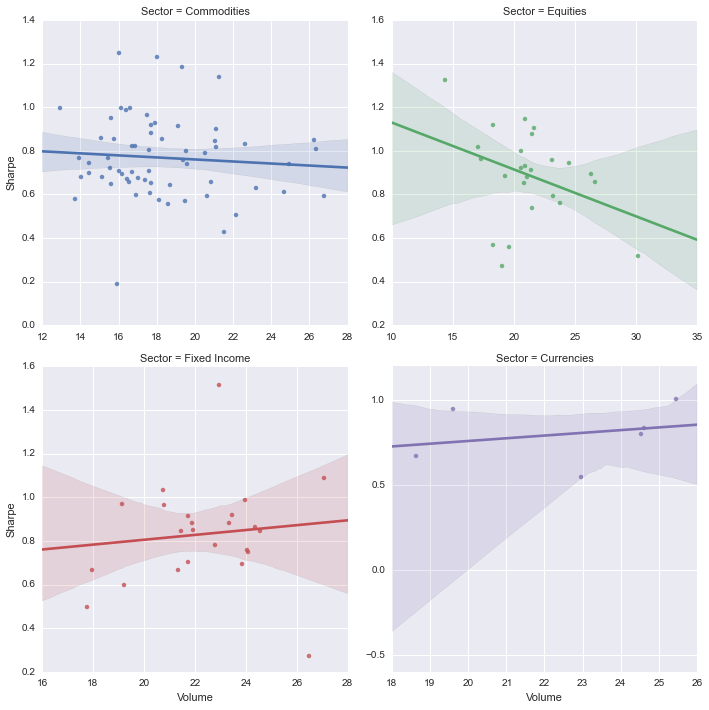

In [14]:
sns.lmplot(x='Volume',fit_reg=True,y='Sharpe',hue='Sector',sharey=False,sharex=False, 
           col='Sector',col_wrap=2,data=compare)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.ewm_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,min_periods=12,adjust=True,com=24).std(bias=False)
  if __name__ == '__main__':


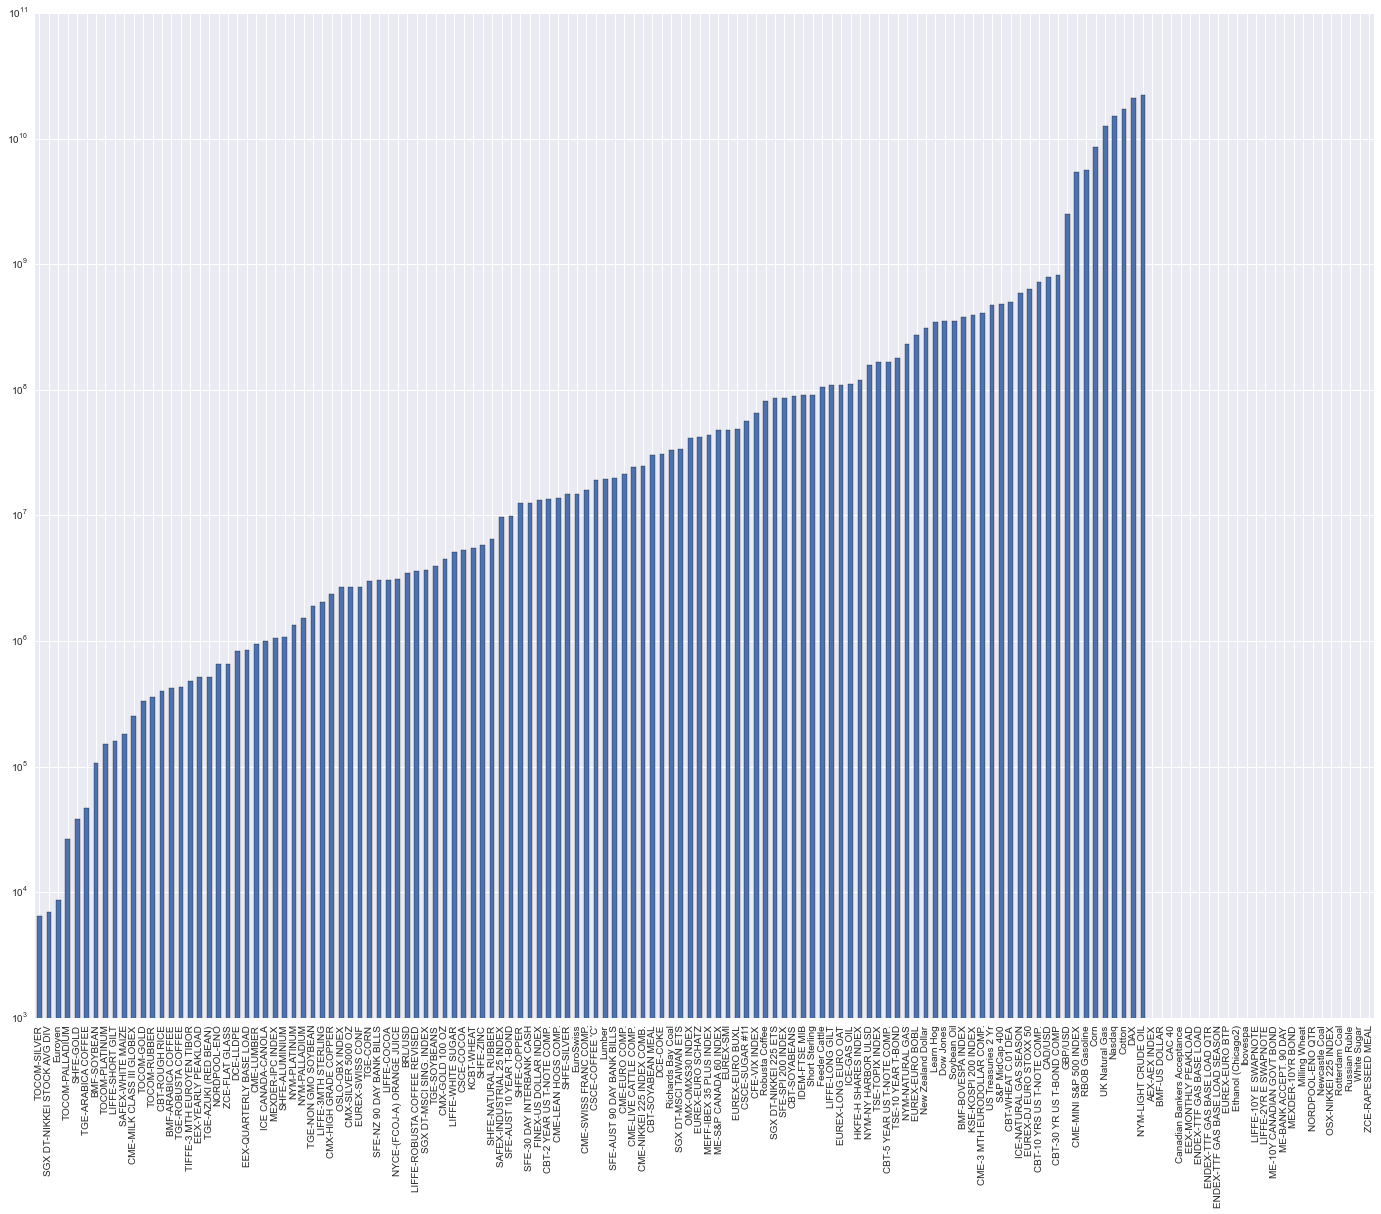

In [24]:
scaled=total_vol.resample(rule='m',how='last') * pd.ewmstd(cleansed.pct_change(),24,min_periods=12)
t=scaled['2016'].tail(1).index[0]
scaled['2016'].tail(1).T[t].sort_values().plot(kind='bar',logy=True)

In [21]:
sq_pnl, sq_means=quantile_pnl_and_means(cleansed,scaled,pnl,4)

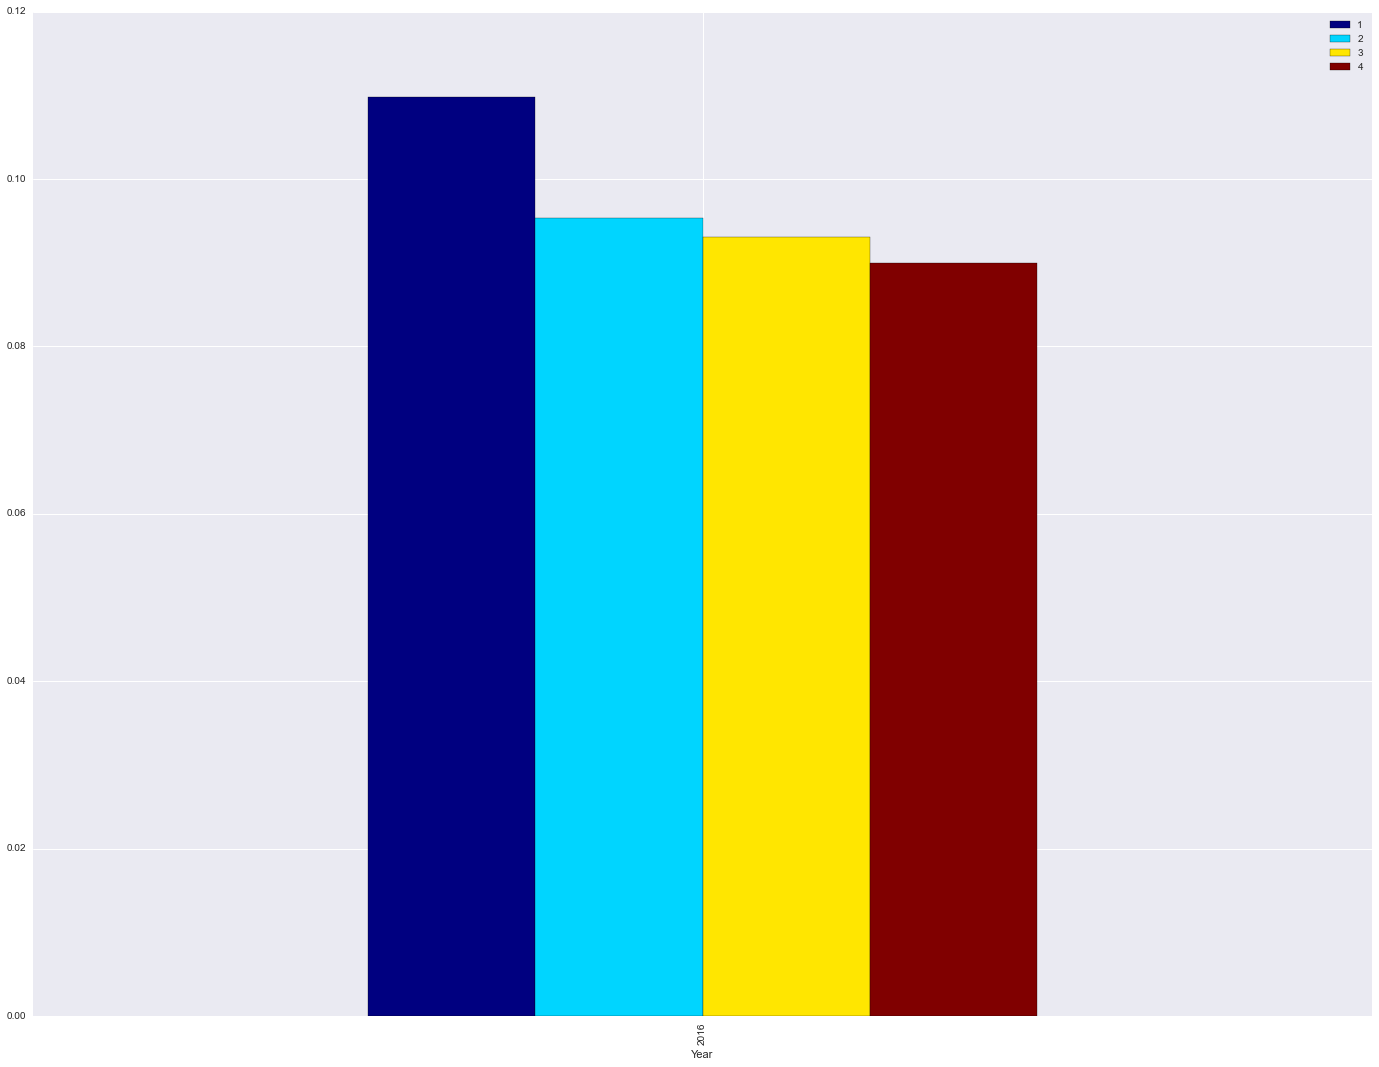

In [22]:
sq_means.cumsum().tail(1).plot(kind='bar',colormap='jet')

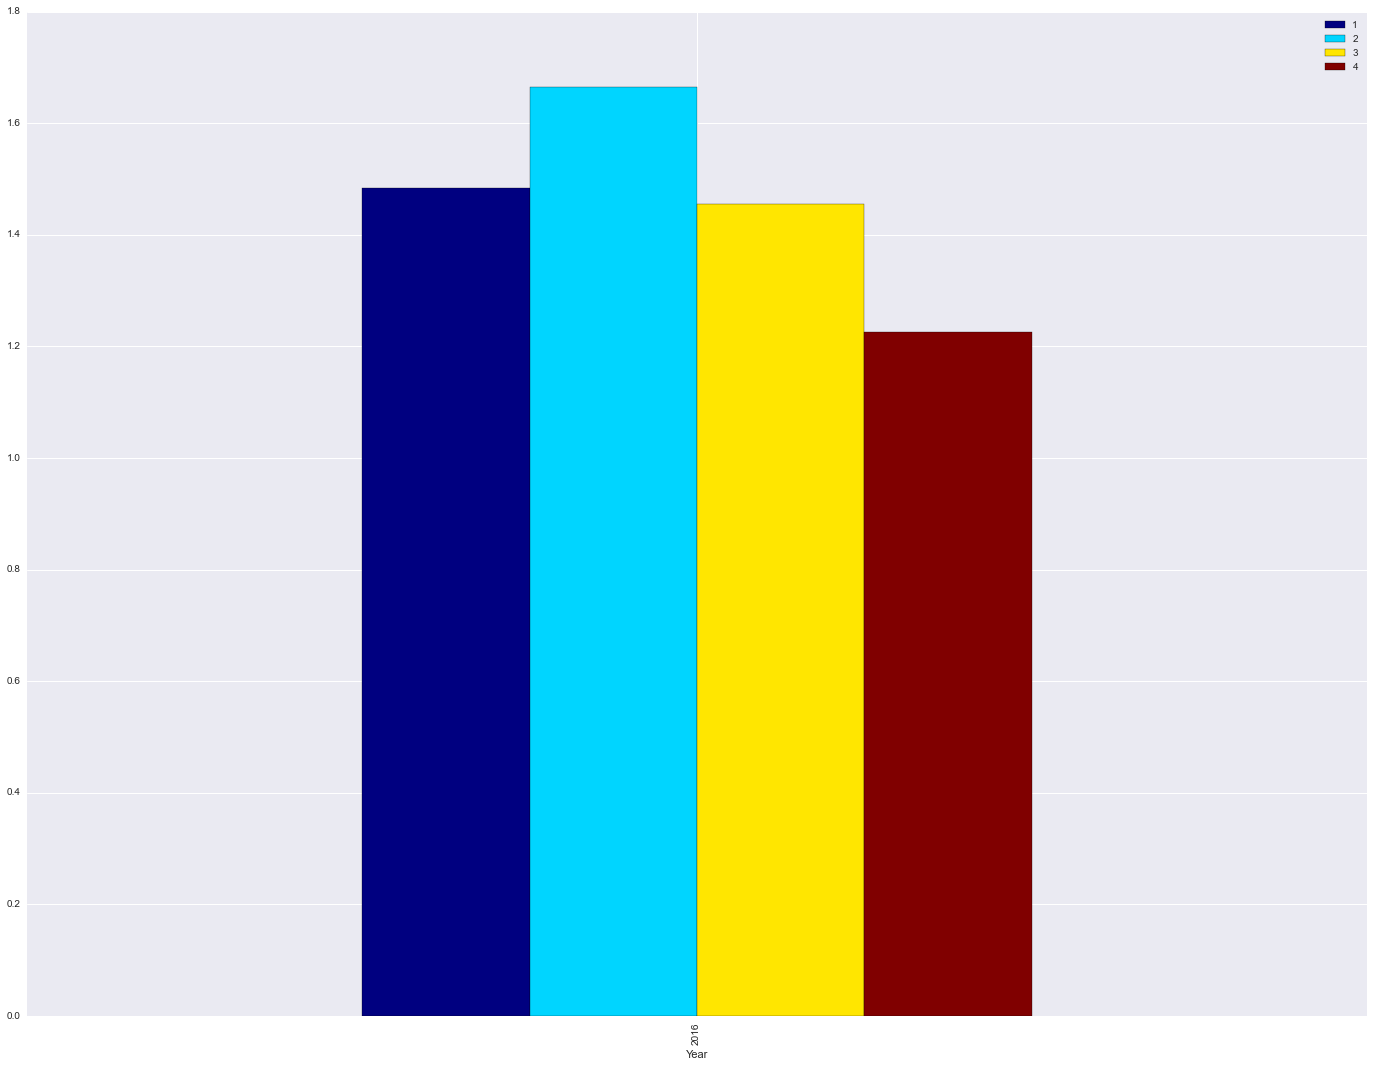

In [23]:
sq_pnl.cumsum().tail(1).plot(kind='bar',colormap='jet')